In [2]:
import numpy as np
import os
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# === 1. Load the training dataset ===
train_folder = 'train_dataset'
image_names = []
X_train = []
y_train = []

for filename in os.listdir(train_folder):
    if filename.endswith('.png'):
        path = os.path.join(train_folder, filename)

        # read images
        img = Image.open(path).convert('L')
        img_array = np.array(img).flatten()
        X_train.append(img_array)

        # extract the real y label
        image_names.append(filename[:-4])
        label = filename.split('-')[-2]    # y label
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)


# === 2. Train SVM model ===
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

clf = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)
clf.fit(X_train, y_train_encoded)

SVC(probability=True, random_state=42)

In [4]:
# evaluate
y_train_pred = clf.predict(X_train)
print("\nTraining dataset:")
print(classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_))


Training dataset:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1255
           1       0.60      0.72      0.65      1271
           2       0.92      0.89      0.90      1184
           3       0.92      0.90      0.91      1275
           4       0.88      0.89      0.88      1246
           5       0.92      0.87      0.89      1229
           6       0.92      0.89      0.90      1243
           7       0.87      0.89      0.88      1208
           8       0.91      0.86      0.89      1215
           9       0.92      0.86      0.89      1250
           a       0.90      0.84      0.87      1231
           b       0.92      0.86      0.89      1267
           c       0.87      0.90      0.89      1234
           d       0.92      0.86      0.89      1292
           e       0.93      0.86      0.89      1275
           f       0.89      0.87      0.88      1275
           g       0.91      0.85      0.88      1283
        

In [ ]:
# save the model
model_save_path = "svm.pkl" 

joblib.dump({
    'model': clf,
    'label_encoder': label_encoder,
    'feature_shape': X_train.shape[1]
}, model_save_path)
print(f"\nsave model in: {model_save_path}")


save model in: svm_clean_train_dataset.pkl


In [6]:
# === 3. Load test dataset ===
test_folder = 'test_dataset'
image_names = []
X_test = []
y_test = []

for filename in os.listdir(test_folder):
    if filename.endswith('.png'):
        path = os.path.join(test_folder, filename)

        # read images
        img = Image.open(path).convert('L')
        img_array = np.array(img).flatten()
        X_test.append(img_array)

        # extract the real y label
        image_names.append(filename[:-4])
        label = filename.split('-')[-2]    # y label
        y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [7]:
# === 4. Model predict ===
y_test_encoded = label_encoder.transform(y_test)

y_pred = clf.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       335
           1       0.44      0.62      0.51       308
           2       0.88      0.77      0.82       314
           3       0.87      0.82      0.84       334
           4       0.73      0.79      0.76       313
           5       0.80      0.72      0.76       315
           6       0.83      0.78      0.80       297
           7       0.78      0.84      0.81       304
           8       0.82      0.74      0.78       329
           9       0.85      0.73      0.79       327
           a       0.77      0.67      0.72       350
           b       0.84      0.72      0.78       312
           c       0.74      0.80      0.77       327
           d       0.81      0.71      0.76       336
           e       0.88      0.77      0.82       308
           f       0.76      0.77      0.76       315
           g       0.83      0.70      0.76       322
    

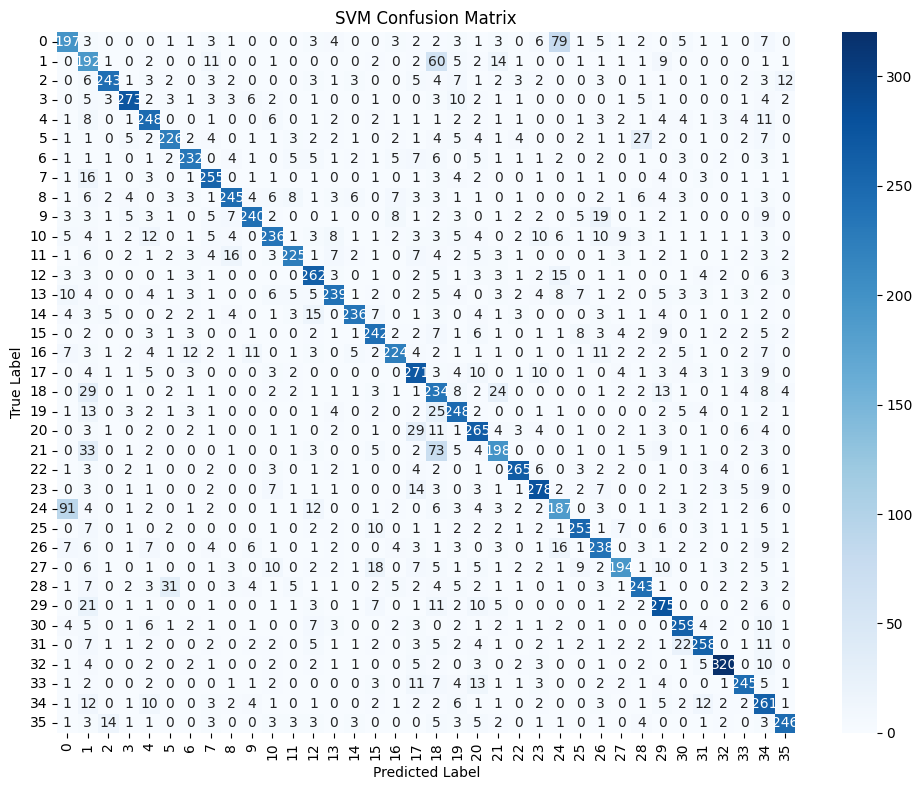

Results saves in svm_predictions.csv


In [8]:
# === 5. Evaluation report ===
print("Classification Report:")
#print(classification_report(y_test, y_pred))
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

print("Accuracy:", accuracy_score(y_test_encoded, y_pred))

print("Confusion Matrix:")
labels = label_encoder.transform(label_encoder.classes_)
train_cm = confusion_matrix(y_test_encoded, y_pred, labels=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, 
            yticklabels=labels)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix_svm.png')
plt.show()

# === 6. Save results into CSV ===
df = pd.DataFrame({
    'Image_Name': image_names,
    'True_Label': y_test,
    'Predicted_Label': y_pred
})
df.to_csv('svm_predictions.csv', index=False)
print("Results saves in svm_predictions.csv")

In [ ]:
# group by 'Image_Name', check characters in images are same
grouped = df.groupby('Image_Name').apply(
    lambda x: (x['True_Label'] == x['Predicted_Label']).all()
)

# Calculate the accuracy
probability = grouped.mean()
print(f"Probability that all True_Label == Predicted_Label for the same Image_Name: {probability:.4f}")

Probability that all True_Label == Predicted_Label for the same Image_Name: 0.0000


C:\Users\q Q h\AppData\Local\Temp\ipykernel_16180\3876803260.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('Image_Name').apply(
